(1796, 64)
9


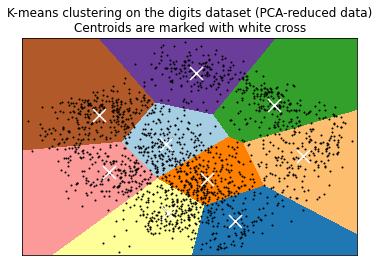

In [2]:
# -*- coding: utf-8 -*-

# Load sklearn, numpy, pandas and matplotlib libraries
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import pairwise_distances_argmin_min
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [4]:
def get_best_kmeans(features:np.ndarray, k_min:int , k_max:int , n_init:int):
    '''
    Returns the Best K and corresponding labels of KMeans algorithm
    '''
    best_k = -1
    best_sil_coeff = -1
    bestk_labels = None
    for k in range(k_min, k_max):
        print("Currently processing for K : {}".format(k))
        labels = KMeans(n_clusters=k, n_init=n_init).fit_predict(features)

        # Using sample size to avoid out of memory error
        sil_coeff = silhouette_score(features, labels, metric='euclidean', sample_size=10000)
        if(sil_coeff > best_sil_coeff):
            best_sil_coeff = sil_coeff
            best_k = k
            bestk_labels = labels

    return (best_k, bestk_labels)


# Load train data and find the best K vlaue
# =============================================================================
data_labels = pd.read_csv('digitsdata.csv')

X = data_labels.iloc[:,:64]
X =  np.array(X)
print(X.shape)

best_k, best_labels  = get_best_kmeans(X, 3, 10, 100)
print(best_k)

(1796, 64)
Currently processing for K : 3
Currently processing for K : 4
Currently processing for K : 5
Currently processing for K : 6
Currently processing for K : 7
Currently processing for K : 8
Currently processing for K : 9
9


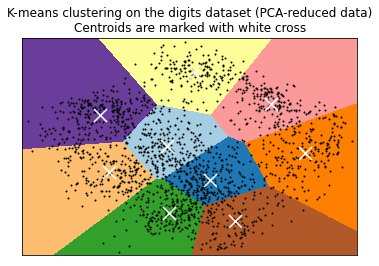

In [6]:
data = X

# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=best_k, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()